In [1]:
%load_ext autoreload
%autoreload 2

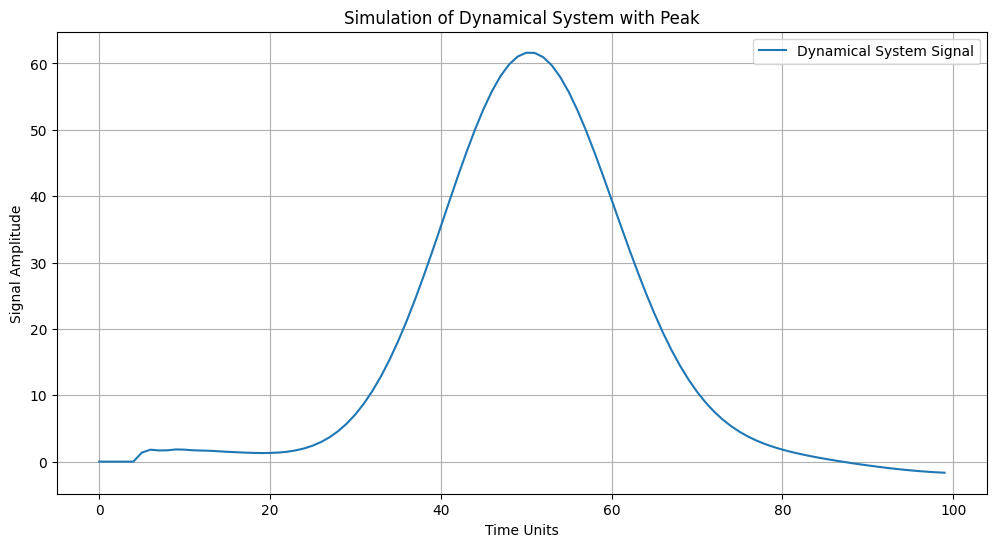

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Module for the dynamical system simulation
def simulate_dynamical_system(x1, x2, x3, time_depth=5, N=100):
    signal = np.zeros(N)
    for t in range(time_depth, N):
        # Example dynamical equation (nonlinear)
        signal[t] = (
            0.3 * signal[t - 1]
            - 0.2 * signal[t - 2]
            + 0.1 * signal[t - 3]
            + 0.05 * signal[t - 4]
            - 0.05 * signal[t - 5]
            + np.sin(x1 * t / 10)
            + np.cos(x2 * t / 20)
            + x3 * np.exp(-((t - N/2)**2) / (2 * (10)**2))  # Gaussian peak controlled by x3
        )
    return signal

# Module for plotting the signal
def plot_signal_with_peak(signal):
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label="Dynamical System Signal")
    plt.xlabel("Time Units")
    plt.ylabel("Signal Amplitude")
    plt.title("Simulation of Dynamical System with Peak")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to run the simulation
def main():
    # Example inputs
    x1 = 1.0
    x2 = 2.0
    x3 = 50.0  # Peak amplitude will depend strongly on this input

    N = 100
    time_depth = 5

    signal = simulate_dynamical_system(x1, x2, x3, time_depth, N)
    plot_signal_with_peak(signal)

if __name__ == "__main__":
    main()


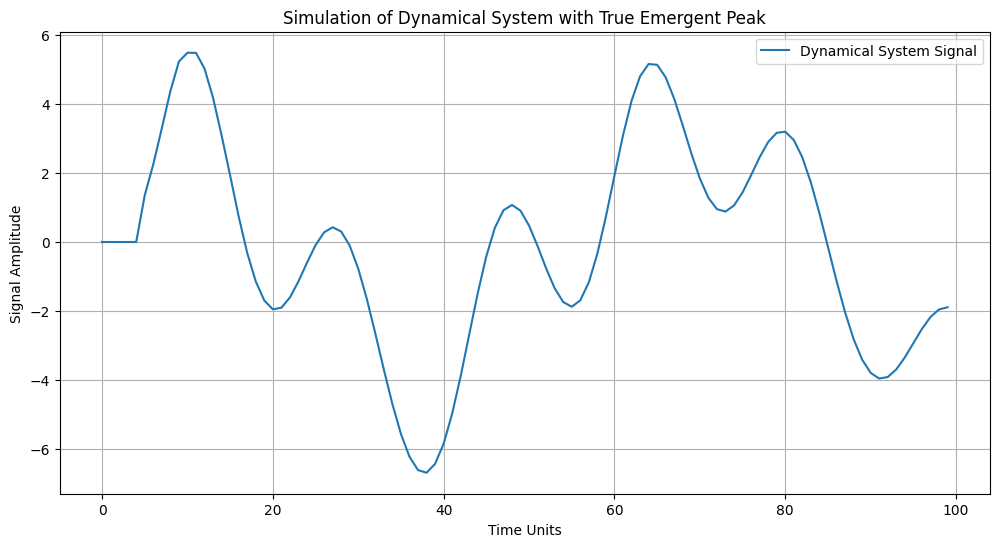

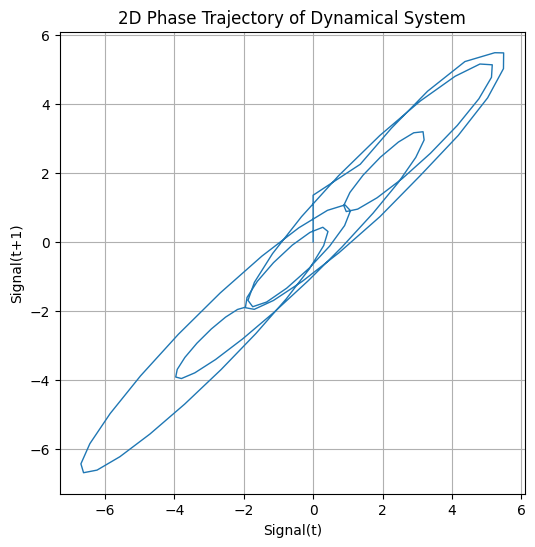

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Module for the dynamical system simulation
def simulate_dynamical_system(x1, x2, x3, time_depth=5, N=100):
    signal = np.zeros(N)
    coeffs = np.linspace(0.6, -0.4, time_depth)  # stronger feedback for instability

    for t in range(time_depth, N):
        # Autoregressive component
        ar_part = sum(coeffs[i] * signal[t - i - 1] for i in range(time_depth))

        # External influence
        periodic_drive = np.sin(x1 * t / 10) + np.cos(x2 * t / 20)

        # Strong nonlinear instability builds to a peak and collapses
        feedback = signal[t - 1] ** 2 - x3 * signal[t - 1] if t > time_depth else 0

        signal[t] = ar_part + periodic_drive - feedback * 0.01

    return signal

# Module for plotting the signal
def plot_signal_with_peak(signal):
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label="Dynamical System Signal")
    plt.xlabel("Time Units")
    plt.ylabel("Signal Amplitude")
    plt.title("Simulation of Dynamical System with True Emergent Peak")
    plt.legend()
    plt.grid(True)
    plt.show()

# 2D trajectory plot using delay embedding
def plot_trajectory(signal, delay=1):
    plt.figure(figsize=(6, 6))
    plt.plot(signal[:-delay], signal[delay:], lw=1)
    plt.xlabel("Signal(t)")
    plt.ylabel(f"Signal(t+{delay})")
    plt.title("2D Phase Trajectory of Dynamical System")
    plt.grid(True)
    plt.show()

# Main function to run the simulation
def main():
    # Example inputs
    x1 = 1.0
    x2 = 2.0
    x3 = 5.0  # Controls peak sharpness

    N = 100
    time_depth = 5

    signal = simulate_dynamical_system(x1, x2, x3, time_depth, N)
    plot_signal_with_peak(signal)
    plot_trajectory(signal)

if __name__ == "__main__":
    main()

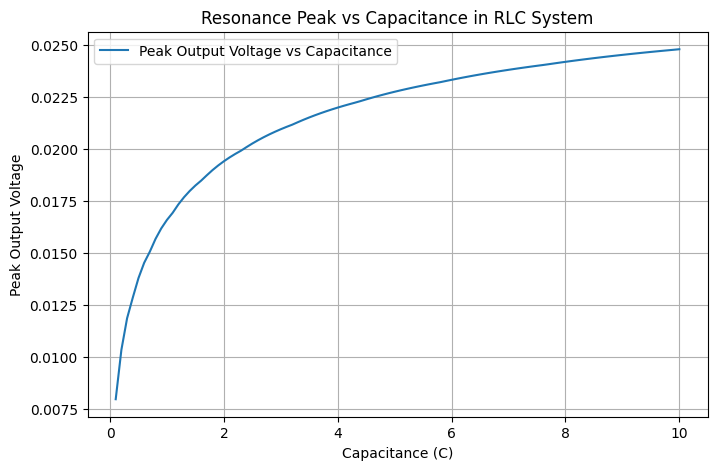

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Module for the RLC-inspired system simulation
def simulate_rlc_dynamical_system(R, L, C, V_drive_fn, N=100, dt=0.1):
    # Initialize voltage and current arrays
    V_out = np.zeros(N)
    I = np.zeros(N)
    dI_dt = np.zeros(N)

    for t in range(2, N):
        V_in = V_drive_fn(t * dt)
        d2I_dt2 = (V_in - R * dI_dt[t - 1] - I[t - 1] / C) / L

        dI_dt[t] = dI_dt[t - 1] + d2I_dt2 * dt
        I[t] = I[t - 1] + dI_dt[t] * dt

        V_out[t] = I[t] * R  # output voltage across resistor

    return V_out

# Drive function with resonance-inducing frequency
def sinusoidal_drive(t, freq=5, amplitude=1.0):
    return amplitude * np.sin(2 * np.pi * freq * t)

# Module for plotting the signal
def plot_signal_with_peak(signal):
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label="RLC System Output Voltage")
    plt.xlabel("Time Units")
    plt.ylabel("Voltage")
    plt.title("RLC-Inspired System with Resonance-Induced Peak")
    plt.legend()
    plt.grid(True)
    plt.show()

# 2D trajectory plot using delay embedding
def plot_trajectory(signal, delay=1):
    plt.figure(figsize=(6, 6))
    plt.plot(signal[:-delay], signal[delay:], lw=1)
    plt.xlabel("V(t)")
    plt.ylabel(f"V(t+{delay})")
    plt.title("2D Phase Trajectory of RLC System")
    plt.grid(True)
    plt.show()

# Main function to run the simulation
def main(R, L, C):
    N = 1000
    dt = 0.01

    signal = simulate_rlc_dynamical_system(R, L, C, sinusoidal_drive, N, dt)
    # plot_signal(signal)
    # plot_trajectory(signal)
    return min(signal), max(signal)

R = L = 1.0  # Ohms and Henry
Cs = np.linspace(0.1, 10.0, 100)
peaks = []
for C in Cs:
    min_peak, max_peak = main(R, L, C)
    peaks.append(max_peak)
plt.figure(figsize=(8, 5))
plt.plot(Cs, peaks, label="Peak Output Voltage vs Capacitance")
plt.xlabel("Capacitance (C)")
plt.ylabel("Peak Output Voltage")
plt.title("Resonance Peak vs Capacitance in RLC System")
plt.legend()
plt.grid(True)
plt.show()
    

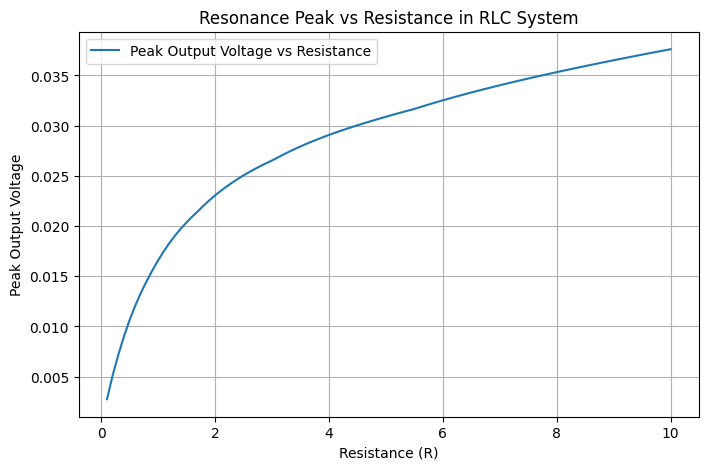

In [19]:
C = L = 1.0  # Ohms and Henry
Rs = np.linspace(0.1, 10.0, 100)
peaks = []
for R in Rs:
    min_peak, max_peak = main(R, L, C)
    peaks.append(max_peak)
plt.figure(figsize=(8, 5))
plt.plot(Rs, peaks, label="Peak Output Voltage vs Resistance")
plt.xlabel("Resistance (R)")
plt.ylabel("Peak Output Voltage")
plt.title("Resonance Peak vs Resistance in RLC System")
plt.legend()
plt.grid(True)
plt.show()


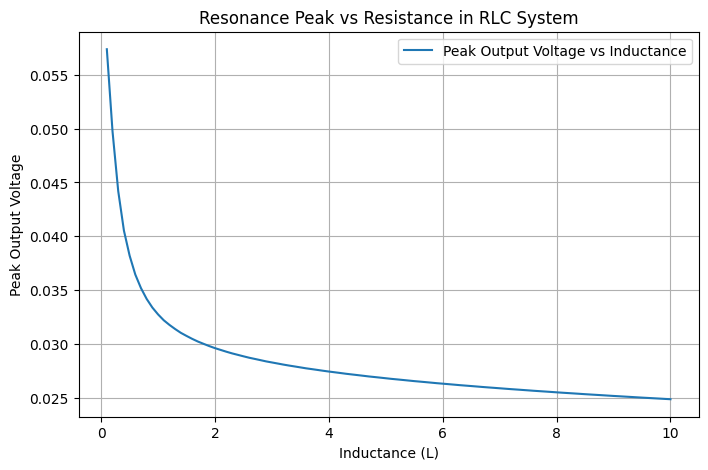

In [21]:
R = C = 5.0  # Ohms and Farads
Ls = np.linspace(0.1, 10.0, 100)
peaks = []
for L in Ls:
    min_peak, max_peak = main(R, L, C)
    peaks.append(max_peak)
plt.figure(figsize=(8, 5))
plt.plot(Ls, peaks, label="Peak Output Voltage vs Inductance")
plt.xlabel("Inductance (L)")
plt.ylabel("Peak Output Voltage")
plt.title("Resonance Peak vs Resistance in RLC System")
plt.legend()
plt.grid(True)
plt.show()


test_01_peak_pass_all (__main__.TestCheckPeakWithPlot.test_01_peak_pass_all) ... 

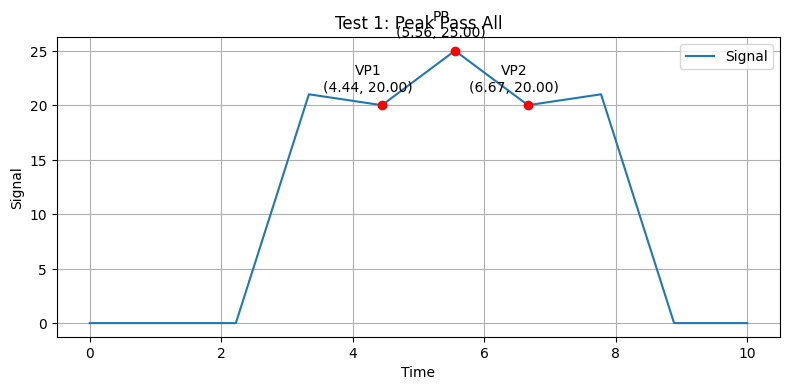

ok

----------------------------------------------------------------------
Ran 1 test in 0.120s

OK


In [2]:
import unittest
import numpy as np
import matplotlib.pyplot as plt
from peak_sfol import check_peak, plot_signal_with_peak

class TestCheckPeakWithPlot(unittest.TestCase):
    def setUp(self):
        self.t = np.linspace(0, 10, 10)

    def test_01_peak_pass_all(self):
        s = np.zeros_like(self.t)
        s[5] = 25
        s[4] = s[6] = 20
        s[3] = s[7] = 21
        result = check_peak(self.t, s, ('>', 2), ('>', 2), None, None, None)
        plot_signal_with_peak(self.t, s, result, "Test 1: Peak Pass All")

unittest.main(argv=[''], verbosity=2, exit=False)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# from lift_simulation import LiftSimulation, run_lift_simulation_for_lifts
# using simulate_rlc_dynamical_system

def simulate_rlc_dynamical_system_wrapper(r):
    L = C = 1.0  # Ohms and Farads
    N = 100
    dt = 0.1
    signal = simulate_rlc_dynamical_system(r, L, C, sinusoidal_drive, N, dt)
    return signal

# hp cause (test all posible values)
def hp_cause(max_r, awt_thr):
    for num_lifts in range(1, max_num_lifts + 1):
        signal = simulate_rlc_dynamical_system(num_lifts)
        if check_peak(np.linspace, s, ('>', 2), ('>', 2), None, None, None)
    return None # f'num_lifts is not a cause of awt < {awt_thr} as long as num_lifts <= {max_num_lifts}'


def hp_cause_mm(max_num_lifts, awt_thr):
    awt = simulate_rlc_dynamical_system(max_num_lifts)
    if awt < awt_thr:
        return max_num_lifts # FIXME: use bisect num_lifts
    return None # f'num_lifts is not a cause of awt < {awt_thr} as long as num_lifts <= {max_num_lifts}'
